# Finite Impulse Response Filter Implementation

### Author: Cagil Gumus


$$ y_n = \sum_{k=0}^{M-1} h_k x_{n-k} $$


where $ x_{n} $ is the ADC output (16 bits signed) and $ h_k $ is the coefficients. The word taps is used for $ M $. For example: 2-taps FIR filter would have the form: 

$$ y_n = x_{n}/2 + x_{n-1}/2 $$

[Referenced from here](https://www.cbcity.de/die-fft-mit-python-einfach-erklaert)



In [1]:
from __future__ import division
from scipy import signal, fft, ifft
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import numpy as np
import matplotlib.pyplot as plt


In [10]:
freq = 100 # in Hz 
sampling_freq = 1000 # in Hz
periods = 10 # Number of periods to be printed
amplitude = 100

np.random.seed(1234) # needed for adding jitter

x = np.arange(0,periods/freq, 1/sampling_freq)

total_samples = len(x)
print("Total sample points: " + str(total_samples))

Total sample points: 100


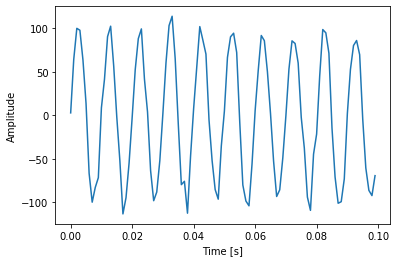

In [12]:
y = amplitude * (np.sin(2*np.pi*freq*x) + 0.1*np.random.randn(x.size))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(x,y)

Now we are going to take the fft of the signal 

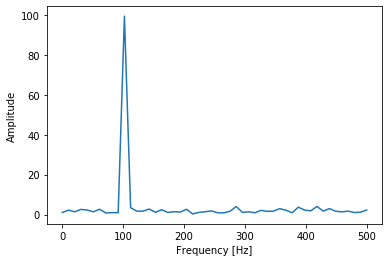

In [13]:
fft_signal = fft(y)

N = total_samples/2

xfreq = np.linspace(0,sampling_freq/2, N)


plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfreq, (2/total_samples)*abs(fft_signal[:int(N)])) # 2/N normalization

Now lets eliminate the 'Leakage effect' by introducing the windows

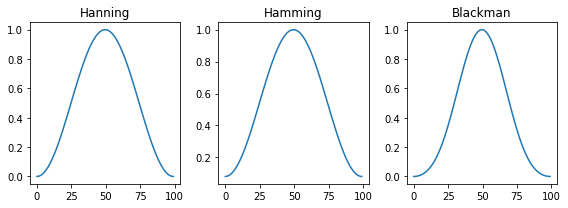

In [14]:
hann = np.hanning(len(y))
hamm = np.hamming(len(y))
black= np.blackman(len(y))

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(hann)
plt.title('Hanning')
plt.subplot(132)
plt.plot(hamm)
plt.title('Hamming')
plt.subplot(133)
plt.plot(black)
plt.title('Blackman')
plt.tight_layout()

Now lets amplitude modulate our input signal with Hanning Window

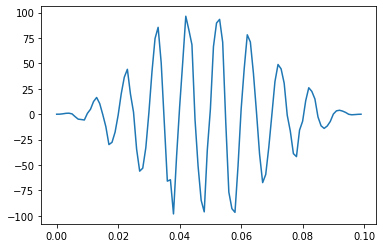

In [15]:
windowed_y = y*hann
plt.plot(x,windowed_y)

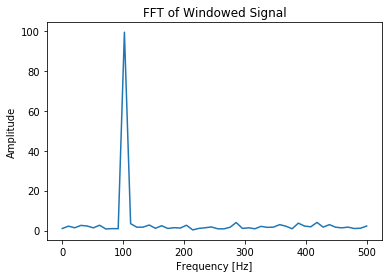

In [16]:
windowed_fft = fft(windowed_y)
plt.title("FFT of Windowed Signal")
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfreq, (2/total_samples)*abs(fft_signal[:int(N)])) # 2/N normalization

## Designing the FIR filter

Now we design our 4 tap FIR filter. With given parameters: 


Ps: This example is taken from [SciPy Cookbook](https://scipy-cookbook.readthedocs.io/items/FIRFilter.html)

727 5.65326


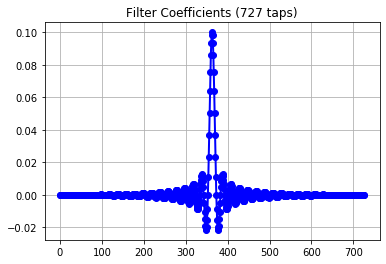

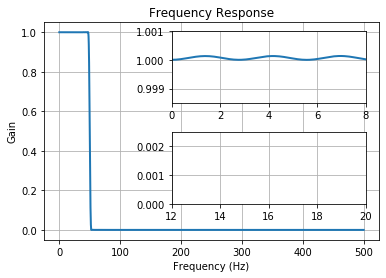

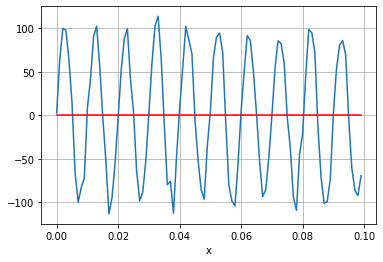

In [19]:
# The Nyquist rate of the signal.
nyq_rate = sampling_freq / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

print(N, beta)

# The cutoff frequency of the filter.
cutoff_hz = 50.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/np.pi)*nyq_rate, abs(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/np.pi)*nyq_rate, abs(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/np.pi)*nyq_rate, abs(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)


#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sampling_freq

figure(3)
# Plot the original signal.
plot(x, y)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(x, filtered_x, 'r-')


xlabel('x')
grid(True)

show()
